In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder , StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [4]:
qa=pd.read_csv(r"C:\Users\Pranamya Sinha\Downloads\datas\QualityPrediction.csv")
qa

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
qa.isnull().sum()            #no null value present in the data set .Thus,data is clean

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
qa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
qa.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


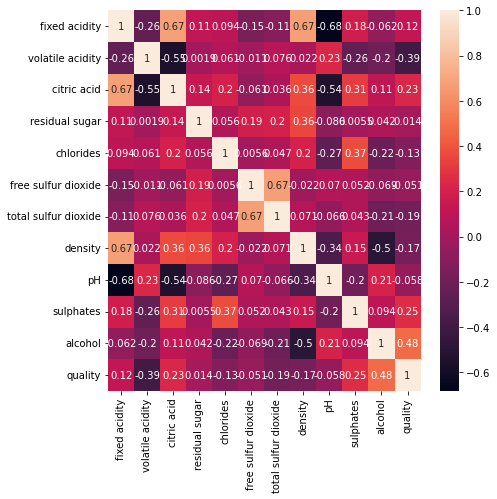

In [33]:
plt.figure(figsize=(7,7))
sns.heatmap(qa.corr(),annot=True)
plt.show()

In [4]:
qa.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# Correlations
#density is highly dependent on fixed acidity and then on citric acid and residual sugar --MULTICOLINEARITY 
#Total sulfur dioxide are mostly free sulfur (free sulfur dioxide)
#fixed acidity is highly dependent on citric acid present in the wine

In [ ]:
#quality of wine depends most on alcohol and then on suphates,citricacid ,fixed acidity
# quality depends least on volatile acidity,chloride,total sulfur acids,free sulfur acids,density pH

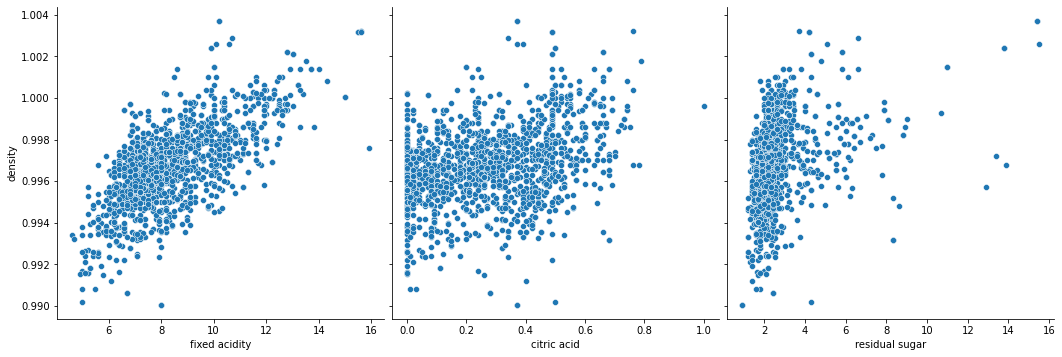

In [12]:
sns.pairplot(qa, x_vars = ['fixed acidity', 'citric acid', 'residual sugar'], y_vars = 'density', size = 5, kind = 'scatter')

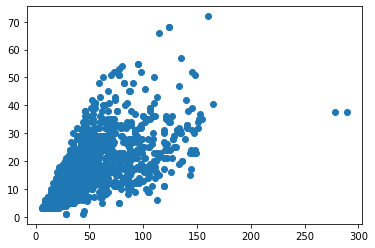

In [13]:
plt.scatter(qa['total sulfur dioxide'], qa['free sulfur dioxide'])
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Density'>

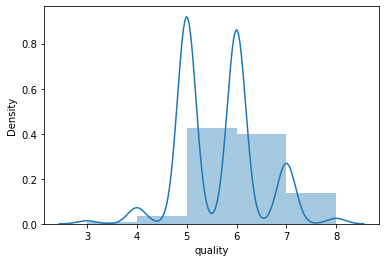

In [9]:
sns.distplot(qa['quality'], bins = 5, kde = True)

In [ ]:
#most of the wine quality got rating as 5 

<AxesSubplot:xlabel='quality'>

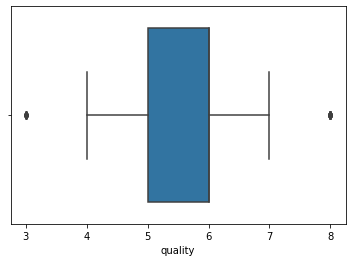

In [11]:
sns.boxplot(qa['quality'])

In [ ]:
#outliers are 3 and 8
# Thus , only few wine got ratiing as 3 and  8    (Through Visualization)

In [3]:
qa.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [4]:
Q1= qa.quality.quantile(0.25)
Q3= qa.quality.quantile(0.75)
Q1,Q3

(5.0, 6.0)

In [6]:
IQR=Q3-Q1
IQR

1.0

In [7]:
ll= Q1-1.5*IQR
ul= Q3+1.5*IQR
ll,ul

(3.5, 7.5)

In [13]:
qa[(qa.quality<ll)|(qa.quality>ul)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
498,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3


In [ ]:
#There are many outliers thus these outliers does makes a significant impact on the quality

In [25]:
mean = qa['quality'].mean()
std = qa['quality'].std()
print('mean of the quality is', mean)
print('std. deviation is', std)

mean of the quality is 5.6360225140712945
std. deviation is 0.8075694397347023


In [30]:
threshold = 3
outlier = []
for i in qa['quality']:            
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


In [ ]:
#Thus, all the values lies within 3 standard deviation 

In [16]:
qa.pH.unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

<AxesSubplot:xlabel='pH', ylabel='Density'>

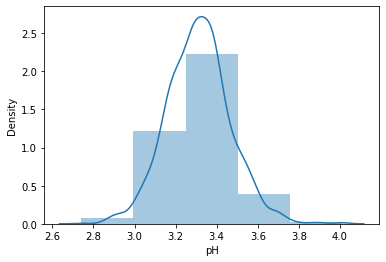

In [17]:
sns.distplot(qa['pH'], bins = 5, kde = True)

<AxesSubplot:xlabel='pH'>

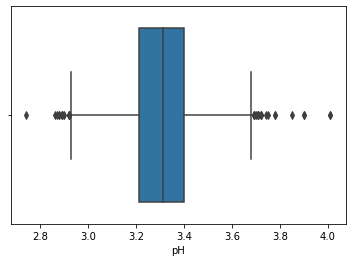

In [22]:
sns.boxplot(qa['pH'])

# Pre-processing

## ENCODING

In [5]:
qa.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [ ]:
#quality of wine is lies between 3-8 , 8 being the heighest

In [7]:
qa['quality_encoded']=LabelEncoder().fit_transform(qa.quality)
qa

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_encoded
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


In [ ]:
# Encoding is done so that it is easy to identify to lowest and heighest quality of wine

In [8]:
wine_drop=qa.drop(qa.loc[:,['quality','pH','volatile acidity','chlorides','total sulfur dioxide','free sulfur dioxide','density']], axis=1)   # dropped quality.(since is it is encoded)
wine_drop

,fixed acidity,citric acid,residual sugar,sulphates,alcohol,quality_encoded
0,7.4,0.00,1.9,0.56,9.4,2
1,7.8,0.00,2.6,0.68,9.8,2
2,7.8,0.04,2.3,0.65,9.8,2
3,11.2,0.56,1.9,0.58,9.8,3
4,7.4,0.00,1.9,0.56,9.4,2
...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.58,10.5,2
1595,5.9,0.10,2.2,0.76,11.2,3
1596,6.3,0.13,2.3,0.75,11.0,3
1597,5.9,0.12,2.0,0.71,10.2,2


In [ ]:
#Droped all the features which does not affect the quality

In [9]:
X = wine_drop.iloc[:,[0,1,2,3,4]].values    #Features / predictors
X

array([[ 7.4 ,  0.  ,  1.9 ,  0.56,  9.4 ],
       [ 7.8 ,  0.  ,  2.6 ,  0.68,  9.8 ],
       [ 7.8 ,  0.04,  2.3 ,  0.65,  9.8 ],
       ...,
       [ 6.3 ,  0.13,  2.3 ,  0.75, 11.  ],
       [ 5.9 ,  0.12,  2.  ,  0.71, 10.2 ],
       [ 6.  ,  0.47,  3.6 ,  0.66, 11.  ]])

In [10]:
Y = wine_drop.iloc[:,5].values   #Target variable-- quality_encoded
Y

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

In [13]:
X_train

array([[ 8.6 ,  0.29,  2.  ,  1.98,  9.8 ],
       [ 8.  ,  0.37,  0.9 ,  0.44, 12.7 ],
       [ 6.8 ,  0.  ,  1.9 ,  0.74,  9.7 ],
       ...,
       [ 7.9 ,  0.31,  2.  ,  0.69,  9.5 ],
       [13.  ,  0.49,  4.3 ,  0.68, 12.7 ],
       [ 9.8 ,  0.32,  2.3 ,  0.48,  9.4 ]])

# Logistic Regression Model

In [15]:
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)  
X_test = standard_Scaler.transform(X_test) 

In [16]:
log_reg=LogisticRegression(random_state=5)
log_reg.fit(X_train,Y_train)

LogisticRegression(random_state=5)

In [17]:
Y_pred=log_reg.predict(X_test)
Y_pred

array([3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 4, 2, 3, 2, 3, 2,
       2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 4, 4,
       3, 2, 2, 3, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2,
       2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 4, 3, 3, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 3, 2, 4, 3, 2, 2, 3, 3, 2, 4, 3, 2, 2, 3, 3, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3,
       3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 4, 3, 3,
       3, 4, 3, 2, 2, 4, 2, 3, 4, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 4, 2, 2, 3, 3, 2, 2,
       2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 4, 2, 4, 2, 4, 2, 2,
       2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3,

In [18]:
Y_test

array([3, 2, 4, 3, 2, 3, 2, 3, 1, 2, 2, 2, 3, 2, 3, 3, 4, 2, 2, 1, 4, 3,
       3, 1, 3, 2, 2, 4, 2, 3, 2, 3, 2, 3, 4, 4, 2, 3, 3, 4, 2, 4, 3, 3,
       2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2,
       2, 2, 2, 3, 1, 2, 4, 3, 3, 2, 3, 2, 5, 3, 3, 3, 2, 2, 2, 2, 4, 2,
       3, 2, 4, 2, 3, 3, 3, 4, 3, 3, 2, 4, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 5, 2, 3, 2, 3, 2, 1, 3, 4, 3, 2, 3, 3, 2, 2, 2,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 5, 2, 3,
       3, 4, 4, 2, 2, 4, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 3, 3, 2, 3, 3, 3, 0, 3, 2, 2, 4, 3, 4, 3, 3, 4, 4, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 4, 2, 3, 2, 3,
       2, 1, 2, 2, 3, 4, 3, 2, 2, 1, 2, 3, 4, 3, 3, 4, 2, 4, 2, 3, 3, 2,
       2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3,

In [19]:
difference = pd.DataFrame(Y_test - Y_pred)
difference.value_counts()

 0    294
 1    101
-1     71
-2      9
 2      5
dtype: int64

In [ ]:
#There are 294 predicted values which are equal to test values

In [20]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred))

Accuracy:  0.6125


In [ ]:
#Since, the accuracy is of only 57% it is very less to go forward with this model

# Decision Tree

### decision tree with depth=3

In [35]:
model_dt_3 = DecisionTreeClassifier(random_state=1,max_depth=3)
model_dt_3.fit(X_train,Y_train)

Y_pred_3 = model_dt_3.predict(X_test)
accuracy_score_3 = accuracy_score(Y_test,Y_pred_3)
print('Accuracy Score for model with depth 3 is: ',accuracy_score_3)

Accuracy Score for model with depth 3 is:  0.60625


### decision tree with depth=2

In [36]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)
model_dt_2.fit(X_train,Y_train)

Y_pred_2 = model_dt_2.predict(X_test)
accuracy_score_2 = accuracy_score(Y_test,Y_pred_2)
print('Accuracy Score for model with depth 2 is: ',accuracy_score_2)

Accuracy Score for model with depth 2 is:  0.54375


### decision tree with depth=1

In [37]:
model_dt_1 = DecisionTreeClassifier(random_state=1,max_depth=1)
model_dt_1.fit(X_train,Y_train)

Y_pred_1 = model_dt_1.predict(X_test)
accuracy_score_1 = accuracy_score(Y_test,Y_pred_1)
print('Accuracy Score for model with depth 2 is: ',accuracy_score_1)

Accuracy Score for model with depth 2 is:  0.59375


In [38]:
model_dt_ent = DecisionTreeClassifier(max_depth=3,criterion='entropy')
model_dt_ent.fit(X_train,Y_train)

Y_pred_ent = model_dt_ent.predict(X_test)

accuracy_score_3 = accuracy_score(Y_test,Y_pred_ent)
print('Accuracy Score for model with depth 3 is: ',accuracy_score_3)

Accuracy Score for model with depth 3 is:  0.6270833333333333


In [73]:
print(classification_report(Y_test,Y_pred_3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        15
           2       0.64      0.79      0.71       208
           3       0.59      0.55      0.57       204
           4       0.45      0.29      0.35        45
           5       0.00      0.00      0.00         5

    accuracy                           0.61       480
   macro avg       0.28      0.27      0.27       480
weighted avg       0.57      0.61      0.58       480



In [ ]:
# Accuracy of decison tree model is 59% which is very less

# RandomForestClassifier

In [24]:
rf = RandomForestClassifier()

In [25]:
parameter_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}
cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=parameter_dist, 
                     n_jobs = 3)
cv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: ', cv_rf.best_params_)

Best Parameters using grid search:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}


In [26]:
rf.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  bootstrap = True,
                  max_depth = 4)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2')

In [27]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2')>

In [28]:
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

In [29]:
accuracy_rf = accuracy_score(Y_test,Y_pred)
accuracy_rf

0.6270833333333333

In [ ]:
#Thus, the accuracy of random forest is 61% which is low for model to give an accurate result

# KNN

In [31]:
scaler = StandardScaler()
feat_s = scaler.fit_transform(wine_drop.drop('quality_encoded',axis=1))
feat_s

array([[-0.52835961, -1.39147228, -0.45321841, -0.57920652, -0.96024611],
       [-0.29854743, -1.39147228,  0.04341614,  0.1289504 , -0.58477711],
       [-0.29854743, -1.18607043, -0.16942723, -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.72391627, -0.16942723,  0.54204194,  0.54162988],
       [-1.39015528, -0.77526673, -0.38227061,  0.30598963, -0.20930812],
       [-1.33270223,  1.02199944,  0.75289408,  0.01092425,  0.54162988]])

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)    
knn.fit(X_train,Y_train)                     
pred = knn.predict(X_test) 

In [49]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        16
           2       0.64      0.70      0.67       210
           3       0.51      0.55      0.52       183
           4       0.48      0.40      0.43        58
           5       0.00      0.00      0.00        11

    accuracy                           0.56       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.53      0.56      0.55       480



In [46]:
accuracy_rate = []
for i in range(3,300):    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,feat_s,wine_drop['quality_encoded'],cv=10)
    accuracy_rate.append(score.mean())

In [47]:
knn = KNeighborsClassifier(n_neighbors=28)   
knn.fit(X_train,Y_train)                    
pred = knn.predict(X_test)                   
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[  0   0   2   1   0   0]
 [  0   0   8   7   0   0]
 [  0   0 152  51   5   0]
 [  0   0  67 119  18   0]
 [  0   0   4  25  16   0]
 [  0   0   0   3   2   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        15
           2       0.65      0.73      0.69       208
           3       0.58      0.58      0.58       204
           4       0.39      0.36      0.37        45
           5       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.27      0.28      0.27       480
weighted avg       0.56      0.60      0.58       480



In [ ]:
#Accuracy of KNN model is 60% which is not large enough to accepted

In [ ]:
#From all the models:
# Random Forest has got the heighest accuracy of 62%
#But still it not accurate enough to be used in the industry